# Decision Tree



### Data Loading and Preprocessing


Importing the Wine Quality Datasets

In [2]:
import pandas as pd

# Paths to the dataset files
white_wine_path = 'C:\\Users\\kzam3\\Downloads\\AI Class Project 2\\winequality-white.csv'
red_wine_path = 'C:\\Users\\kzam3\\Downloads\\AI Class Project 2\\winequality-red.csv'


# Loading the datasets
white_wine = pd.read_csv(white_wine_path, sep=';')
red_wine = pd.read_csv(red_wine_path, sep=';')

# Let's peek at the first few rows of each dataset to see what we're working with
print("White Wine Dataset:")
print(white_wine.head())

print("\nRed Wine Dataset:")
print(red_wine.head())


White Wine Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  


# Understanding Our Wines

Before we let our digital sommelier loose on the data, we need to understand what we're working with. Let's check the quality and cleanliness of our datasets, much like how you'd ensure your wine glasses are spotless before serving.

In [3]:
# Check for missing values in both datasets
print("Missing values in White Wine Dataset:")
print(white_wine.isnull().sum())

print("\nMissing values in Red Wine Dataset:")
print(red_wine.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in White Wine Dataset:")
print(white_wine.duplicated().sum())

print("\nDuplicate rows in Red Wine Dataset:")
print(red_wine.duplicated().sum())


Missing values in White Wine Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values in Red Wine Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicate rows in White Wine Dataset:
937

Duplicate rows in Red Wine Dataset:
240


# Preparing the Data for Our Sommelier

Just as you'd prepare the wine glasses and the setting for your guests, we need to prepare our data for the decision tree. We'll combine the red and white wine datasets, add a 'type' feature to distinguish between them, and handle any data cleaning steps necessary to ensure our model gets the best possible input.

In [4]:
# Adding a 'type' column to distinguish between red and white wines
white_wine['type'] = 0  # Let's say 0 represents white wine
red_wine['type'] = 1    # And 1 represents red wine

# Combining the datasets
wine_data = pd.concat([white_wine, red_wine], axis=0)

# Now, let's shuffle the data to ensure our sommelier gets a good mix
wine_data = wine_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the combined dataset
print("Combined Wine Dataset:")
print(wine_data.head())


Combined Wine Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.25         0.45             2.3      0.045   
1            7.6              0.14         0.74             1.6      0.040   
2            6.2              0.15         0.27            11.0      0.035   
3            6.7              0.16         0.32            12.5      0.035   
4            6.8              0.27         0.22            17.8      0.034   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 40.0                 118.0  0.99064  3.16       0.48   
1                 27.0                 103.0  0.99160  3.07       0.40   
2                 46.0                 116.0  0.99602  3.12       0.38   
3                 18.0                 156.0  0.99666  2.88       0.36   
4                 16.0                 116.0  0.99890  3.07       0.53   

   alcohol  quality  type  
0     11.9        7     0  
1     1

# Building the Decision Tree Model

This step involves creating the decision tree classifier. Think of this as outlining the criteria our digital sommelier will use to determine wine quality.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
# Set random_state to a fixed number if you want reproducibility
decision_tree = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import train_test_split

# Assuming wine_data is your combined dataset and 'quality' is the target variable
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the Model

Now, we'll train the model with our prepared dataset, much like how you'd educate our sommelier about different wines' nuances.

In [6]:
# Assuming you have already split your data into features (X) and target (y) and into training and testing sets
# X_train, X_test, y_train, y_test

decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Making Predictions and Evaluating the Model

After training the model, we'll use it to make predictions on our test set, and then evaluate its performance.

In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6046153846153847

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.22      0.25      0.24        44
           5       0.63      0.65      0.64       412
           6       0.63      0.64      0.64       551
           7       0.60      0.57      0.58       241
           8       0.46      0.36      0.40        45
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.36      0.35      0.36      1300
weighted avg       0.60      0.60      0.60      1300



# Visualizing the Decision Tree

Visualizing the decision tree can provide insight into how the model makes its decisions, just like visualizing the thought process of our sommelier.

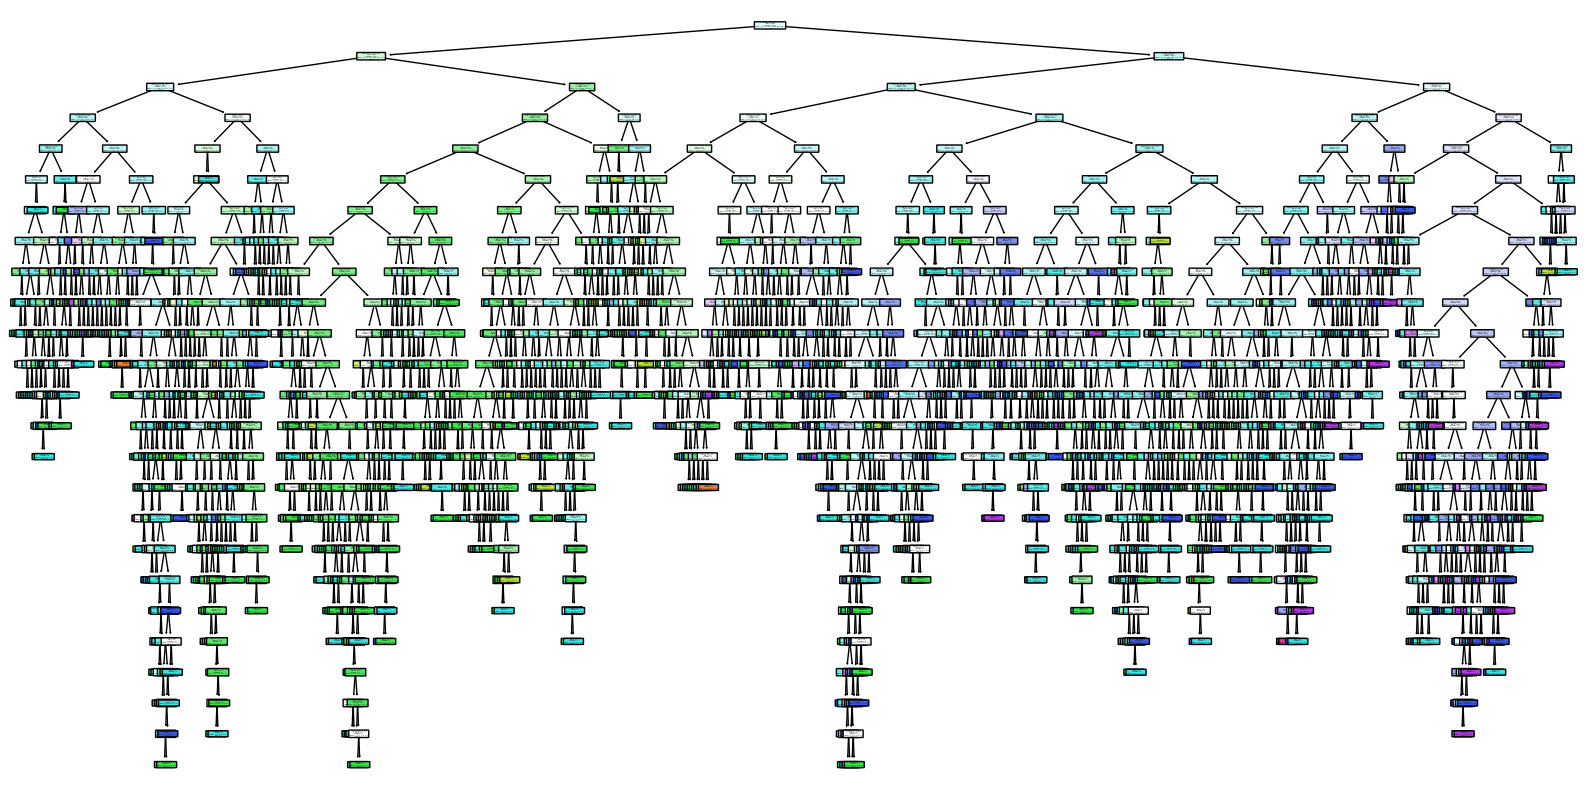

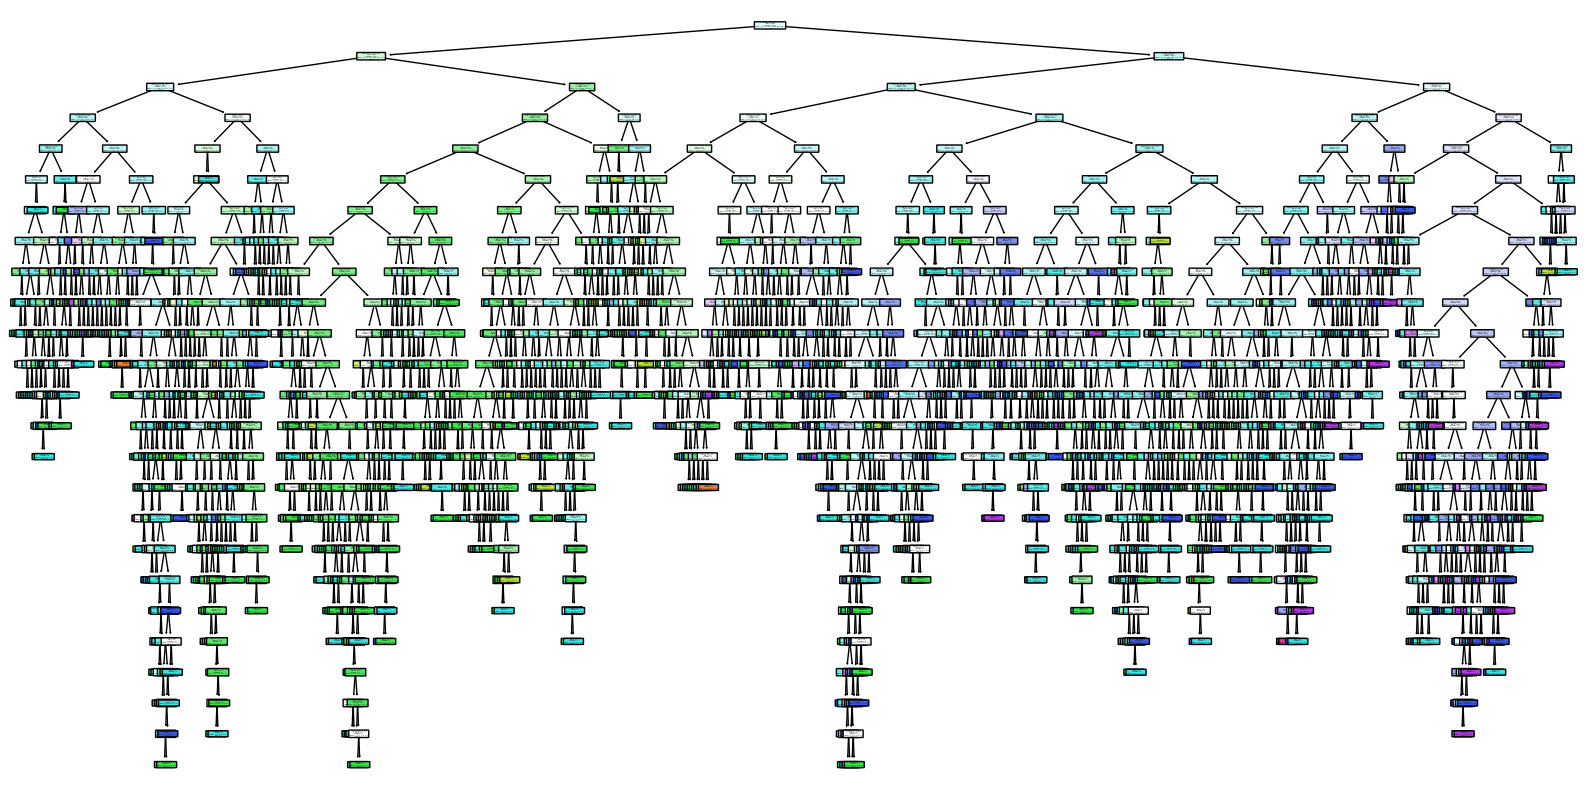

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

# First plot
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
               feature_names=X.columns.tolist(),  # converting to list
               class_names=[str(cls) for cls in decision_tree.classes_],  # Ensuring class names are string
               filled=True, rounded=True)
plt.show()

# Second plot 
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
               feature_names=X.columns.tolist(),  # Convert column names to list
               class_names=[str(cls) for cls in decision_tree.classes_],  # Ensure class names are string
               filled=True, rounded=True)
plt.show()


# Refining the Model

Based on the model's performance, we may want to refine it by tuning its parameters, perhaps through grid search or by pruning the tree to avoid overfitting.



1. Pruning the Tree

Pruning reduces the size of the decision tree by removing parts of the tree that do not provide additional power in classifying instances. 




Pruning reduces the size of the decision tree by removing parts of the tree that do not provide additional power in classifying instances. 



In [9]:
#Max Depth: Limit the depth of the tree to prevent the model from becoming overly complex.
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)


In [10]:
#Min Samples Split: Set the minimum number of samples required to split an internal node.

decision_tree = DecisionTreeClassifier(min_samples_split=10, random_state=42)


In [11]:
#Min Samples Leaf: Set the minimum number of samples required to be at a leaf node.
decision_tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\s

Best alpha:  0.0002317300510426817


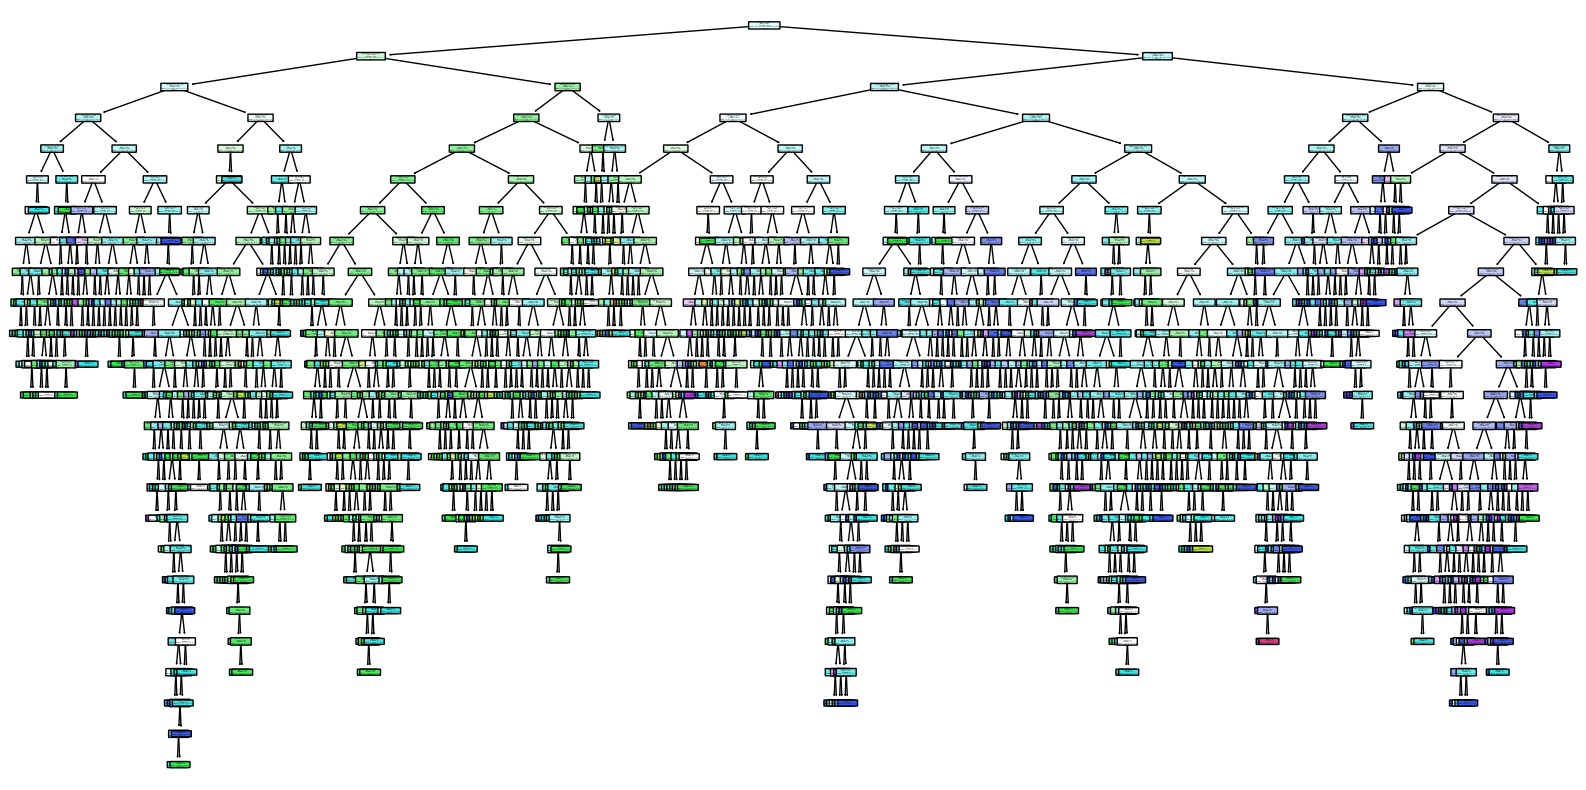

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model without pruning
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Determine the effective alphas and corresponding impurities
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Store the average accuracy scores
alpha_scores = []

for ccp_alpha in ccp_alphas:
    tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
    alpha_scores.append(scores.mean())

# Find the alpha value that maximizes accuracy
best_alpha = ccp_alphas[np.argmax(alpha_scores)]
print("Best alpha: ", best_alpha)

# Train the pruned decision tree
pruned_tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree_clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(pruned_tree_clf, 
               feature_names=X.columns.tolist(), 
               class_names=[str(cls) for cls in pruned_tree_clf.classes_], 
               filled=True, rounded=True)
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), parameters, cv=3, scoring='accuracy')
clf.fit(X_train, y_train)



print(clf.best_params_)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.22      0.27      0.24        44
           5       0.63      0.65      0.64       412
           6       0.62      0.64      0.63       551
           7       0.60      0.52      0.56       241
           8       0.41      0.31      0.35        45
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.35      0.34      0.35      1300
weighted avg       0.60      0.59      0.59      1300



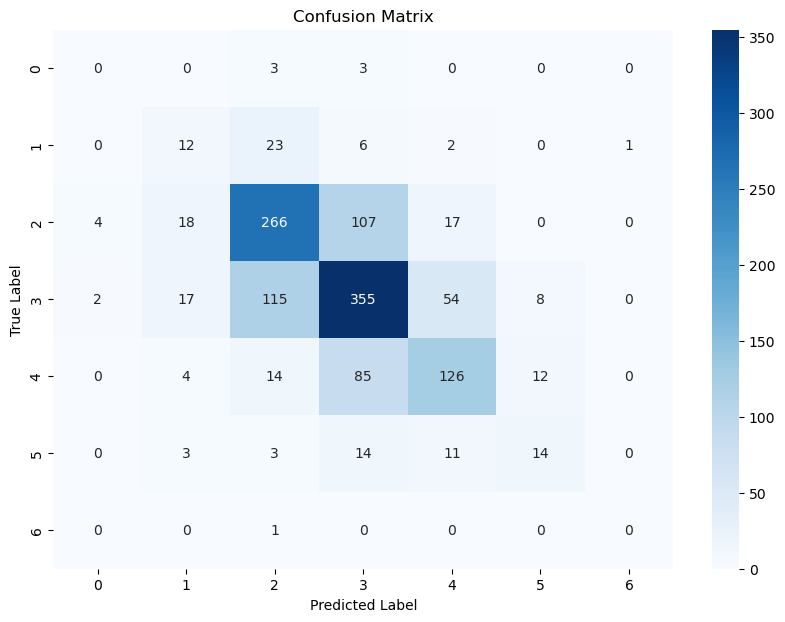

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
y_pred = pruned_tree_clf.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Classification Report Analysis

Class 3: The model failed to correctly predict any instance of class 3 (precision = recall = f1-score = 0.00), which indicates it's struggling with this class, possibly due to a very small number of samples.

Class 4: This class has low precision (0.22) and slightly higher recall (0.27), indicating more false positives and a moderate ability to identify true positives.

Class 5 and 6: These classes have the highest number of samples and show relatively better performance with precision, recall, and f1-scores around 0.6. However, there's still room for improvement, especially in reducing false positives and negatives.

Class 7: Shows moderate performance but with a tendency to under-predict (recall = 0.52).

Class 8: Like Class 7, it has moderate scores but with fewer correct predictions (recall = 0.31).

Class 9: Similar to Class 3, it has zero scores across the board, likely due to the extremely low number of samples.

## Confusion Matrix Analysis

Class 3 (0 correct predictions): The model failed to identify any samples of class 3 correctly. This is a significant concern, indicating that the model might not have learned enough features to distinguish this class, or not enough data. [6 samples]

Class 4 (12 correct predictions): There are some correct predictions, but the number is relatively low compared to the total samples of this class. [44 samples]

Class 5 (266 correct predictions): This class has a relatively high number of correct predictions, showing the model's strength in identifying this class. However, considering the total number of samples (412), there's still potential for better classification.

Class 6 (355 correct predictions): Similar to Class 5, Class 6 shows a strong number of correct predictions. Yet, with 551 samples in total, the model can improve in distinguishing this class more accurately. *Dark Blue on the Matrix* (551 samples)

Class 7 (126 correct predictions): The model moderately identifies this class, but with 241 total samples, the precision and recall could be enhanced.

Class 8 (14 correct predictions): While there are some correct predictions, the number is low, suggesting that the model struggles with this class. (45 samples)

Class 9 (0 correct predictions): Like Class 3, no correct predictions were made for Class 9, indicating a significant issue in detecting or differentiating this class. (1 sample)

## Misclassification Insights:

The model tends to confuse adjacent classes, which is visible in the off-diagonal numbers. For example, Class 5 samples might be misclassified as Class 6 or 4, indicating challenges in distinguishing closely rated qualities.
The confusion between adjacent classes could be due to overlapping features among these classes, suggesting that the model might benefit from more discriminative features or a more sophisticated approach to handling the subtle differences between close quality ratings.


## Overall Assessment

Accuracy: 0.59 

    

